In [6]:
from scipy.stats import norm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn

#Задача 1 - Вероятность распределения и уровень значимости
mean = 30
std_dev = 1
# what is probability that espresso will contain less than 29 ml of coffee
threshold = 29
probability = norm.cdf(threshold, loc=mean, scale =std_dev)
print (f"the probability that espresso will contain less than 29 ml of coffee: {probability:.2f}%")

# under 5% of significance level, the probability of 16% is higher than level of significance and thus we deny H0
# that espresso might contain less than 29 ml of coffee
if probability > 0.05:
    print ("we deny H0 that espresso might not contain less than 29 ml of coffee")



the probability that espresso will contain less than 29 ml of coffee: 0.16%
we deny H0 that espresso might contain less than 29 ml of coffee


In [14]:
# Задача 2 - Вероятность распределения и уровень значимости
mean = 18
std_dev = 4
#Врач хочет проверить, какова вероятность того, что применение нового лекарства приведет к снижению уровня 
#холестерина на 22 мг/дл или больше, что будет считаться значительным улучшением по сравнению со стандартными
threshold = 22
probability = 1 - norm.cdf(threshold, loc=mean, scale=std_dev)
print (f"the probability that new medicament will lead cholesterol to decrease for 22mg and more: {probability:.2f}%")
if probability > 0.01:
    print ("we deny H0 that new medicament will not lead to cholesterol decrease more than 22 mg")


the probability that new medicament will lead cholesterol to decrease for 22mg and more: 0.16%
we deny H0 that new medicament will not lead to cholesterol decrease more than 22 mg


In [18]:
#Задача 3 - Вероятность распределения
mean = 20
std_dev = 2
# what is probability that brochure will contain less than 18 pages which will not be acceptable
threshold = 18
probability = norm.cdf (threshold, loc=mean, scale = std_dev)

print (f"the probability that brochure will contain less than 18 pages: {probability:.2f}%")
if probability > 0.05:
    print ("we deny H0 that brochure will not contain less than 18 pages")




the probability that brochure will contain less than 18 pages: 0.16%
we deny H0 that brochure will not contain less than 18 pages


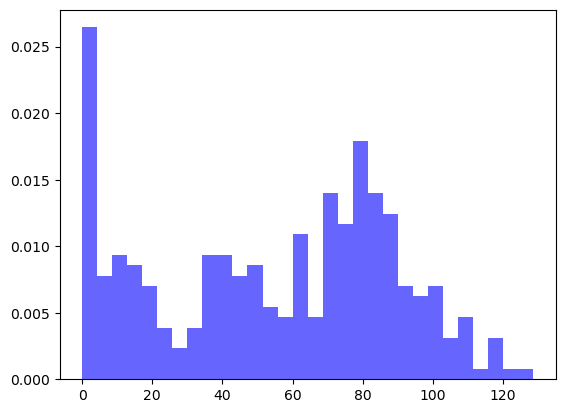

In [24]:
# Задача 4 - Центральная предельная теорема
import random
np.random.seed(105)
random_data = (np.random.random(1000)*100).tolist()+np.random.exponential(5,200).tolist()+np.random.normal(80,20,500).tolist()

np.mean(random_data)
sample_data = np.random.choice(random_data, 300)
plt.hist(sample_data, bins = 30, color = 'b', density=True, alpha=0.6)
plt.show()


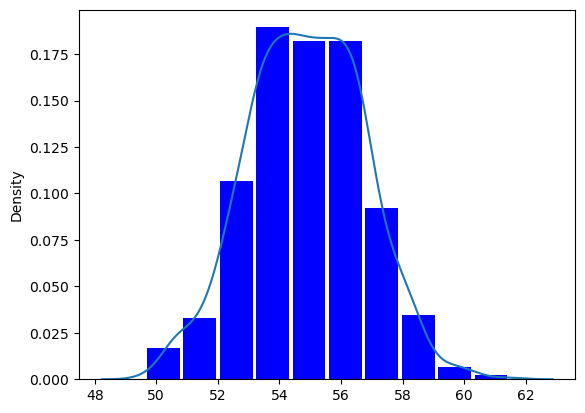

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
collected_means = []
for i in range (1000):
    sample_data = np.random.choice(random_data, 300)
    sample_mean = np.mean(sample_data)
    collected_means.append(sample_mean)
plt.hist(collected_means, color = 'b', density=True, rwidth=0.9)
sns.kdeplot(collected_means)
plt.show()


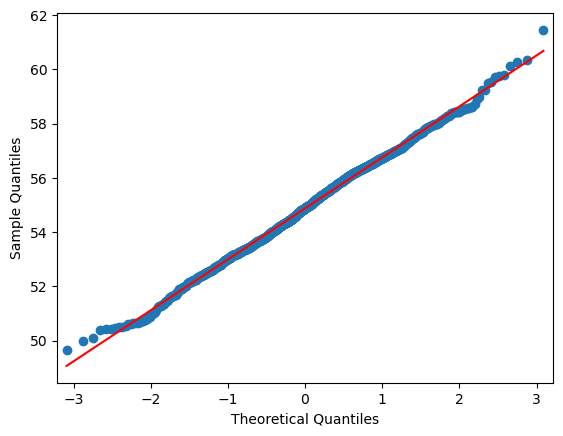

In [35]:
import statsmodels.api as sm
sm.qqplot(np.array(collected_means), line='r')
plt.show()



In [81]:
import numpy as np
from scipy.stats import norm

# Параметры распределения
mean = 30  # Среднее время в пути до работы
std_dev = 10  # Стандартное отклонение выборки
sample_size = 50  # Размер выборки

# Генерируем выборку из нормального распределения
sample = np.random.normal(mean, std_dev, sample_size)

# Вычисляем среднее значение выборки
sample_mean = np.mean(sample)

# Вычисляем стандартную ошибку среднего
std_error = std_dev / np.sqrt(sample_size)

# Вычисляем вероятность того, что среднее значение выборки будет близко к среднему значению генеральной совокупности
threshold = 0.05  # Пороговое значение для уровня значимости (5%)
lower_bound = norm.ppf(threshold / 2, loc=mean, scale=std_error)
upper_bound = norm.ppf(1 - threshold / 2, loc=mean, scale=std_error)
probability = norm.cdf(upper_bound, loc=sample_mean, scale=std_error) - norm.cdf(lower_bound, loc=sample_mean, scale=std_error)

# Выводим результаты
print(f"Среднее значение выборки: {sample_mean:.2f}")
print(f"Стандартная ошибка среднего: {std_error:.2f}")
print(f"Вероятность того, что среднее значение выборки будет близко к {mean} минутам: {probability:.2f}")
print(f"95% доверительный интервал для среднего значения: ({lower_bound:.2f}, {upper_bound:.2f})")


Среднее значение выборки: 32.85
Стандартная ошибка среднего: 1.41
Вероятность того, что среднее значение выборки будет близко к 30 минутам: 0.48
95% доверительный интервал для среднего значения: (27.23, 32.77)


179.42895802324256 171.37162260328324


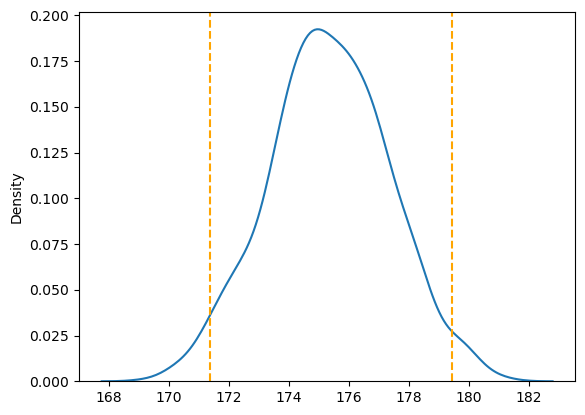

We are 95% confident that average height of student lies between: 171.372, 179.429 centimeters.


In [83]:
#Задача 6 - Оценка доверительного интервала

mean = 175
std_dev = 65
#Оцените 95% доверительный интервал для среднего роста студентов и
#визуализируйте распределение с помощью KDE-графика.
sample_size = 1000
np.random.seed(105)
#height = np.random.gamma(7.2,24,1000)
height = np.random.normal(mean,std_dev,sample_size)
norm_dist_std= std_dev / np.sqrt(len(height))
mean = np.mean(height)

# confidence interval
ul = norm.ppf(0.975, mean, norm_dist_std)
ll = norm.ppf(0.025, mean, norm_dist_std)
print (ul,ll)
demonstration_list = np.random.normal(mean, norm_dist_std, 1000)
sns.kdeplot(demonstration_list)
plt.axvline(ul, linestyle = '--', color='orange')
plt.axvline(ll, linestyle = '--', color='orange')
plt.show()

print(f"We are 95% confident that average height of student lies between: {ll:.3f}, {ul:.3f} centimeters.")


72.77483175887261
71.95347760038409


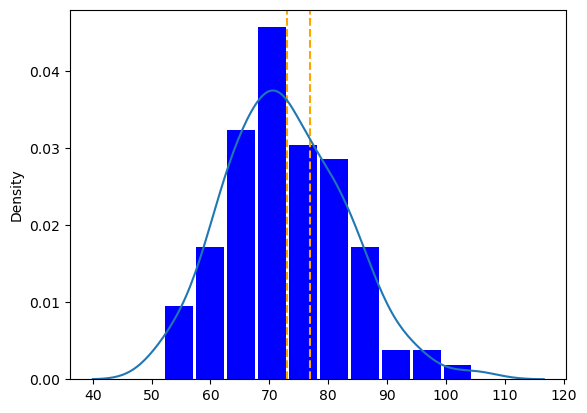

In [94]:
#Задача 7 - Точечная оценка
mean = 75
std_dev = 10
sample_size = 100
# Мы хотим сгенерировать выборку из 100 оценок, чтобы проанализировать, 
#как могут распределяться оценки текущего года. Посчитайте точечную оценку
scores = np.random.gamma(56,1.3,100)
norm_dist_std = std_dev / np.sqrt(len(scores))
#точечная оценка
print(np.mean(scores))
print(np.median(scores))
ul = norm.ppf(0.975, mean, norm_dist_std)
ll = norm.ppf(0.025, mean, norm_dist_std)
plt.hist(scores, color = 'b', density=True, rwidth=0.9)
plt.axvline(ul, linestyle = '--', color='orange')
plt.axvline(ll, linestyle = '--', color='orange')
sns.kdeplot(scores)
plt.show()